#### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np

from kde_ebm import mixture_model
from kde_ebm import mcmc
from kde_ebm import plotting
from kde_ebm import datasets
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### READING SYNTHETIC DATASET

In [15]:
X, Y, biomarker_name, condition_name = datasets.load_synthetic('synthetic_1500_10.csv')
X = X[:,:5]
biomarker_name = biomarker_name[:5]

In [16]:
X_column = pd.DataFrame(X,columns=biomarker_name)
Y_column = pd.DataFrame(Y,columns=['Condition'])

Y_Name = Y_column.apply(lambda x : condition_name[x])
Y_Name.rename(columns={'Condition': 'Condition Name'}, inplace=True)

In [17]:
df = pd.concat((X_column,Y_Name,Y_column),axis=1)
df.head()

,BM1,BM2,BM3,BM4,BM5,Condition Name,Condition
0,-0.692,-0.190,1.217,-1.142,0.082,CN,0
1,0.199,-0.238,-0.156,0.627,0.288,CN,0
2,-0.668,1.080,1.161,0.399,0.070,AD,1
3,1.091,-0.796,0.012,0.705,0.052,CN,0
4,1.195,2.981,4.020,2.057,3.439,AD,1


#### FITTING GAUSSIAN MIXTURE MODEL FOR EACH BIOMARKER AND PLOTTING THE RESULTS

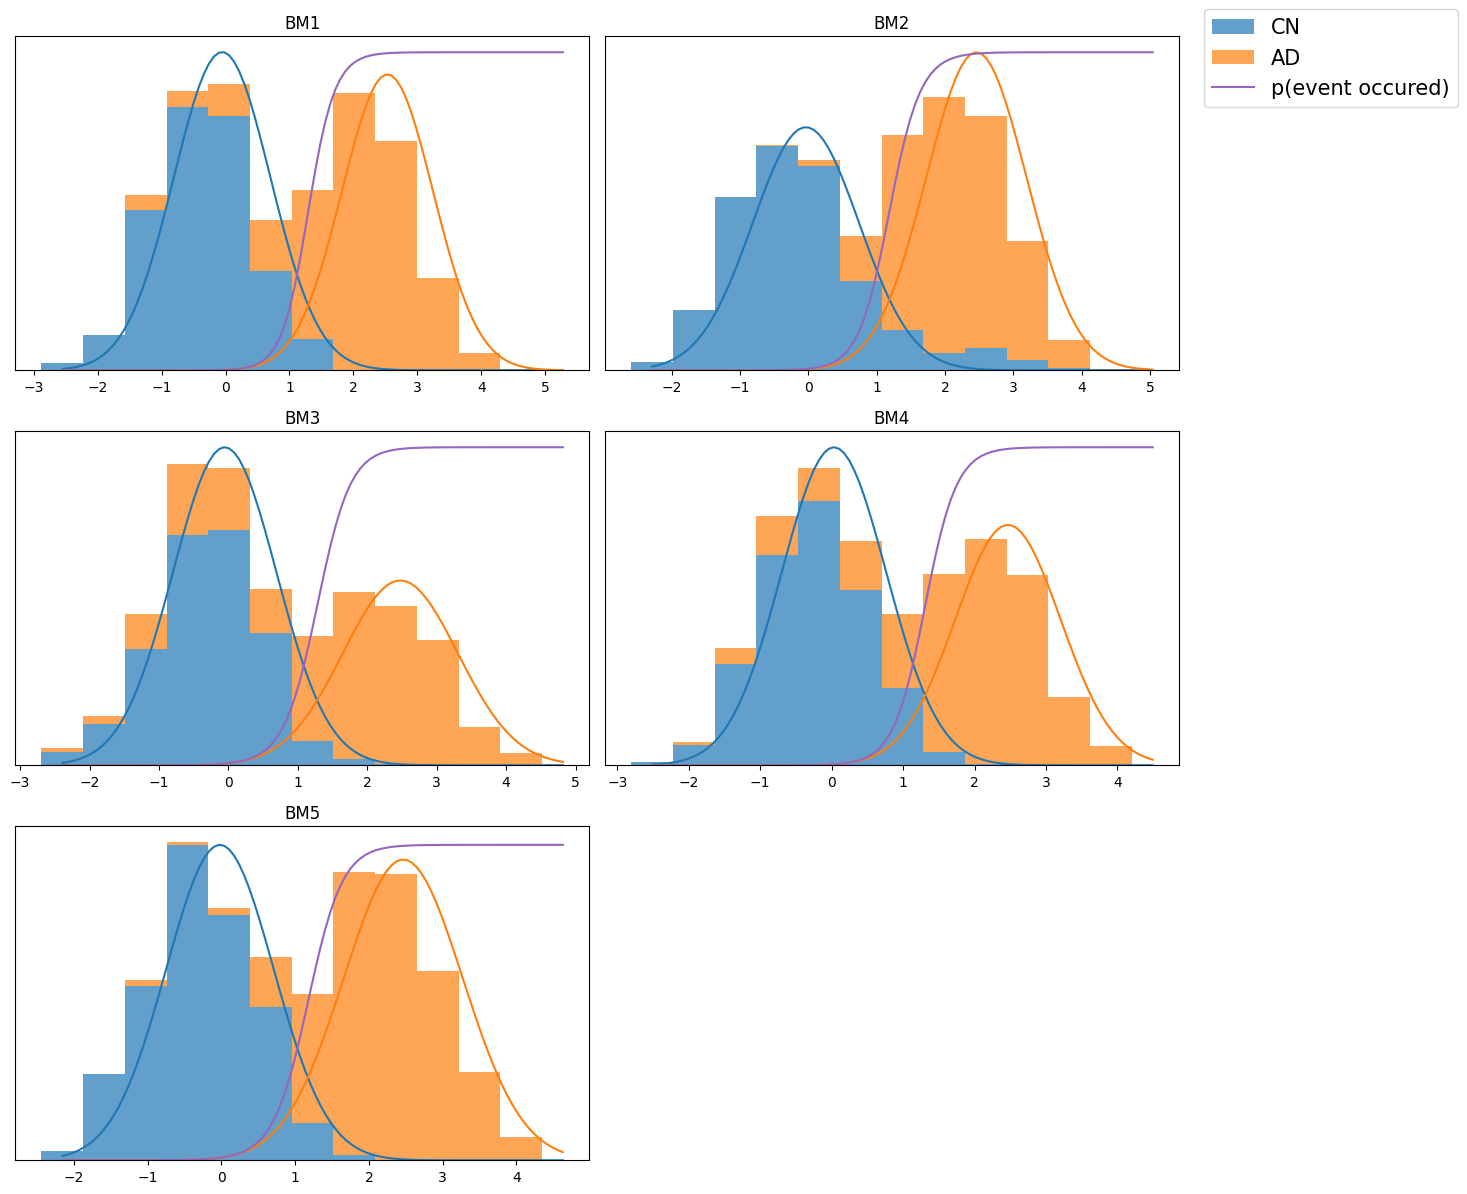

In [18]:
gmm = mixture_model.fit_all_gmm_models(X, Y)
fig, ax = plotting.mixture_model_grid(X, Y, gmm,score_names=biomarker_name,class_names=condition_name)
fig.show()

#### FITTING DISEASE SEQUENCE BY GREEDY ASCENT FOLLOWED BY MCMC

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1714.75it/s]


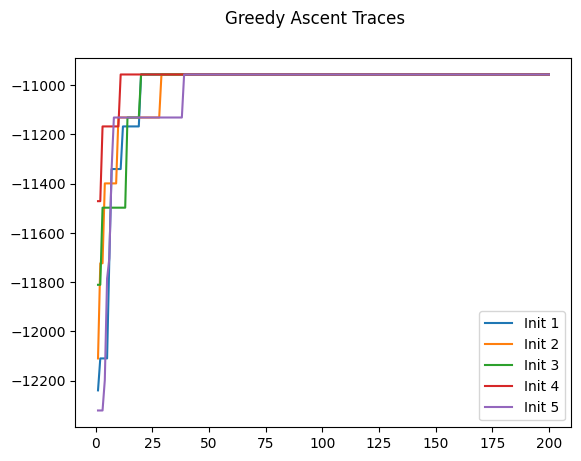

In [19]:
result = mcmc.mcmc(X, gmm, n_iter=10000, greedy_n_iter=200, greedy_n_init=5)

#### POSITIONAL VARIANCE DIAGRAM

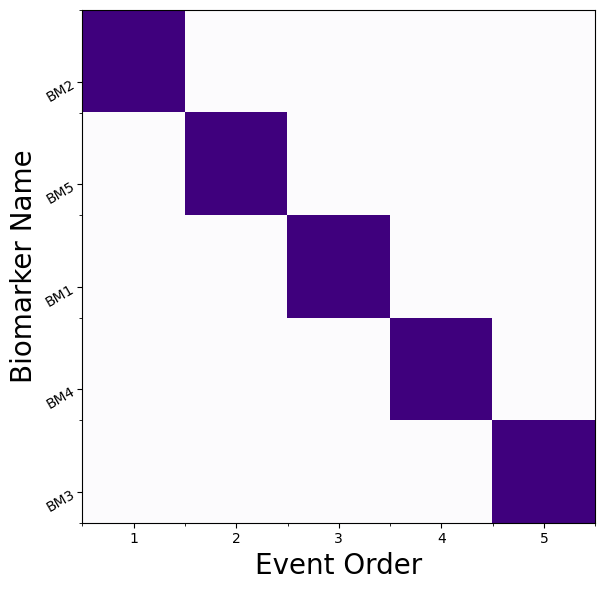

In [20]:
fig, ax = plotting.mcmc_uncert_mat(result, score_names=biomarker_name)
fig.show()

In [21]:
result.sort(reverse=True)
max_likelihood_order = result[0]

In [22]:
max_likelihood_order

EventOrder(order=array([1, 4, 0, 3, 2]), score=np.float64(-10956.983778403512))

#### PATIENT STAGING USING FITTED EBM

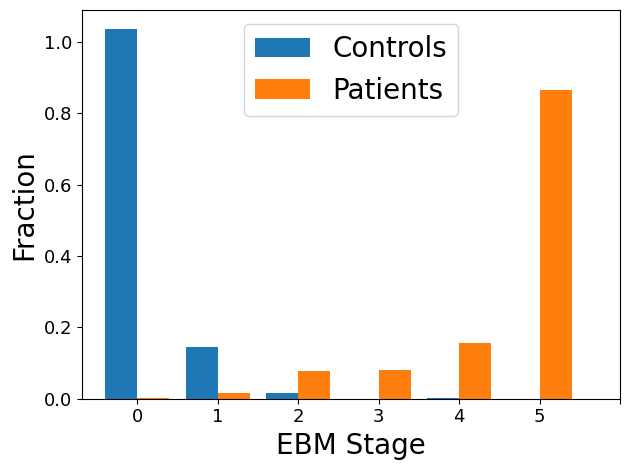

In [23]:
probability_matrix = mixture_model.get_prob_mat(X, gmm)
stages, stages_like = max_likelihood_order.stage_data(probability_matrix)
fig, ax = plotting.stage_histogram(stages,Y,)
plt.show()